# Project: Mall Customer Segmentation

## Description

The dataset is from kaggle (https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis/data)

Description of the Features in the dataset are as the following
1. Customer ID: A numeric key that represents every single customer
2. Gender: The Gender of each customer
3. Annual Income(k$): The income of each customer in 1000's dollar
4. Spending Score: A numeric represent that represents the spending of each customer (100 being highest, 0 being lowest)

The dataset contains 200 samples

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
feature_cols = [x for x in df.columns if x not in ['CustomerID']]

In [6]:
feature_cols

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Objectives

The objective of this project is to segment customers according to features such as, Age, Annual income and Spending score to be able to recommend and design marketing campaigns targeting each cluster

## Exploratory Data Analysis

C:\Users\youse\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\youse\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\youse\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

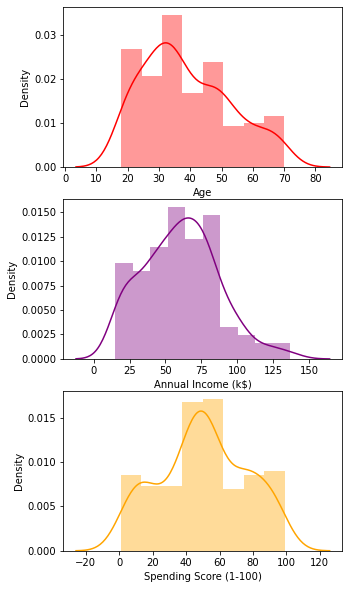

In [8]:
_, ax = plt.subplots(3, 1, figsize = (5, 10))
sns.distplot(df['Age'], ax=ax[0], color = 'red')
sns.distplot(df['Annual Income (k$)'], ax = ax[1], color = 'purple')
sns.distplot(df['Spending Score (1-100)'], ax = ax[2], color = 'orange')

In [9]:
## Binary encoding the Gender feature, Now our data is ready to be fed to Clustering algorithms
X = pd.get_dummies(df)

## Best Model

In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

In [11]:
feature_cols = [x for x in X.columns if x != 'CustomerID']

In [12]:
feature_cols

['Age',
 'Annual Income (k$)',
 'Spending Score (1-100)',
 'Gender_Female',
 'Gender_Male']

In [13]:
X_scaled = X.drop('CustomerID', axis = 1)
scaler = StandardScaler().fit(X_scaled)
X_scaled = scaler.transform(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

In [17]:
## Using elbow method to idetify the optimal number of clusters

number_of_clusters = list(range(2, 20))
inertia = []
models = []

for n in number_of_clusters:
    km = KMeans(n_clusters = n)
    km = km.fit(X_scaled)
    inertia.append(km.inertia_)
    models.append(km)

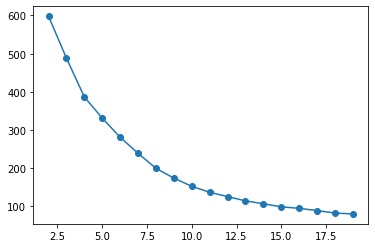

In [18]:
## Plotting the elbow curve

plt.plot(number_of_clusters, inertia)
plt.scatter(number_of_clusters, inertia)

In [19]:
best_km = models[8]

In [20]:
X_scaled['cluster'] = best_km.fit_predict(X_scaled)

In [21]:
Group_by = X_scaled.groupby(by = 'cluster').mean()

In [22]:
Group_by

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
cluster,,,,,
0,1.093007,-0.279400,-0.026399,0.886405,-0.886405
1,1.330759,-0.484861,-0.427869,-1.128152,1.128152
2,0.192942,-1.298583,-1.145535,0.886405,-0.886405
3,-0.932454,-1.294598,1.123607,0.886405,-0.886405
4,-0.399900,1.013441,1.260407,-1.128152,1.128152
5,-0.477932,0.972848,1.221585,0.886405,-0.886405
6,-1.022051,-0.758211,0.437840,-1.128152,1.128152
7,-0.027007,0.967012,-1.397168,-1.128152,1.128152
8,-0.790630,-0.092943,-0.142022,0.886405,-0.886405


In [23]:
X_original = scaler.inverse_transform(X_scaled[feature_cols])

In [24]:
X_original = pd.DataFrame(X_original, columns=feature_cols)

In [25]:
X_original['cluster'] = best_km.fit_predict(X_scaled)

In [26]:
X_original.head(10)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,19.0,15.0,39.0,0.0,1.0,8
1,21.0,15.0,81.0,0.0,1.0,8
2,20.0,16.0,6.0,1.0,0.0,7
3,23.0,16.0,77.0,1.0,0.0,5
4,31.0,17.0,40.0,1.0,0.0,7
5,22.0,17.0,76.0,1.0,0.0,5
6,35.0,18.0,6.0,1.0,0.0,7
7,23.0,18.0,94.0,1.0,0.0,5
8,64.0,19.0,3.0,0.0,1.0,4
9,30.0,19.0,72.0,1.0,0.0,5


In [28]:
group_by = X_original.groupby(by = 'cluster').mean().sort_values(by = 'Spending Score (1-100)', ascending = False)
group_by

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
cluster,,,,,
6,33.277778,87.111111,82.666667,0.0,1.0
2,32.190476,86.047619,81.666667,1.0,0.0
5,25.857143,26.642857,79.142857,1.0,0.0
8,24.608696,40.695652,61.478261,0.0,1.0
1,54.080000,53.240000,49.520000,1.0,0.0
0,27.833333,58.125000,46.541667,1.0,0.0
4,57.392857,47.857143,39.178571,0.0,1.0
9,44.600000,92.333333,21.600000,1.0,0.0
7,41.538462,26.538462,20.692308,1.0,0.0


## Mean Shift

In [39]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth = 2)

In [49]:
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,1,19,15,39,0,1,1
1,2,21,15,81,0,1,1
2,3,20,16,6,1,0,7
3,4,23,16,77,1,0,5
4,5,31,17,40,1,0,7
...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,4
196,197,45,126,28,1,0,0
197,198,32,126,74,0,1,6
198,199,32,137,18,0,1,1


In [48]:
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,clusters,cluster
0,1,19,15,39,0,1,1,1
1,2,21,15,81,0,1,1,1
2,3,20,16,6,1,0,5,7
3,4,23,16,77,1,0,8,5
4,5,31,17,40,1,0,5,7
...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,4,4
196,197,45,126,28,1,0,7,0
197,198,32,126,74,0,1,3,6
198,199,32,137,18,0,1,2,1


In [52]:
X.drop('clusters', axis = 1, inplace=True)
X.drop('cluster', axis = 1, inplace = True)
X_meanshift['cluster'] = ms.fit_predict(X_scaled)

In [78]:
groupby = X_meanshift.groupby('cluster').mean().sort_values(by = 'Spending Score (1-100)', ascending = False)
groupby

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
cluster,,,,,,
6,160.444444,33.277778,87.111111,82.666667,0,1
4,163.333333,32.190476,86.047619,81.666667,1,0
5,24.285714,25.857143,26.642857,79.142857,1,0
3,80.840000,54.080000,53.240000,49.520000,1,0
1,103.071429,30.880952,61.142857,40.095238,0,1
2,69.857143,57.392857,47.857143,39.178571,0,1
0,123.871795,34.282051,71.282051,36.948718,1,0
7,23.461538,41.538462,26.538462,20.692308,1,0


In [59]:
X_meanshift['cluster'].value_counts()

1    42
0    39
2    28
3    25
4    21
6    18
5    14
7    13
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='Count'>

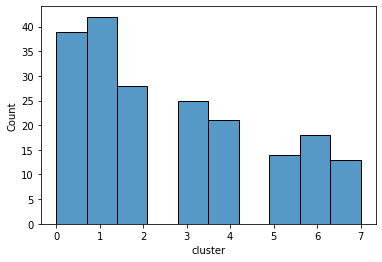

In [77]:
sns.histplot(X_meanshift['cluster'], bins=10)

In [56]:
groupby

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
cluster,,,,,,
6,160.444444,33.277778,87.111111,82.666667,0,1
4,163.333333,32.190476,86.047619,81.666667,1,0
5,24.285714,25.857143,26.642857,79.142857,1,0
3,80.840000,54.080000,53.240000,49.520000,1,0
1,103.071429,30.880952,61.142857,40.095238,0,1
2,69.857143,57.392857,47.857143,39.178571,0,1
0,123.871795,34.282051,71.282051,36.948718,1,0
7,23.461538,41.538462,26.538462,20.692308,1,0


## Hierarchical

In [33]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = list(range(2,20))
inertias = []
models = []

agg = AgglomerativeClustering(n_clusters= 10, 
                             affinity = 'euclidean',
                             linkage = 'ward')
agg = agg.fit(X_scaled)

    
    

In [62]:
X_Hierarchical = X
X_Hierarchical['cluster'] = agg.fit_predict(X_scaled)

In [63]:
group_by = X_Hierarchical.groupby(by = 'cluster').mean().sort_values(by = 'Spending Score (1-100)', ascending = False)
group_by

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
cluster,,,,,,
3,160.444444,33.277778,87.111111,82.666667,0,1
4,163.333333,32.190476,86.047619,81.666667,1,0
8,24.285714,25.857143,26.642857,79.142857,1,0
1,55.130435,24.608696,40.695652,61.478261,0,1
6,80.840000,54.080000,53.240000,49.520000,1,0
9,94.416667,27.833333,58.125000,46.541667,1,0
0,69.857143,57.392857,47.857143,39.178571,0,1
7,171.000000,44.600000,92.333333,21.600000,1,0
5,23.461538,41.538462,26.538462,20.692308,1,0


<AxesSubplot:xlabel='cluster', ylabel='Count'>

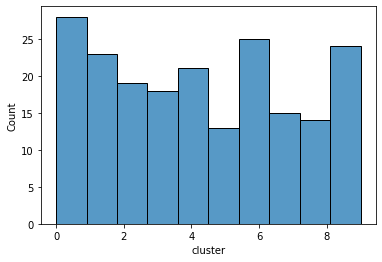

In [76]:
sns.histplot(X_Hierarchical['cluster'], bins=10)

## Key Findings

We can observe that Clusters 3, 4 in Hiererchical Model is almost the same as clusters 6, 2 in KMeans model and 6,3 in the MeanShift model have the same features, Males and Females averaging the age of 34 and having incomes of $80K+ have the highest spending scores!

## Flaws and revisiting

##### Flaws:
1. The dataset is small, I think having more observations would be more beneficial and make us more confident in the insights extracted

##### Revisiting:
1. I think have more details about the type of purchases of the customers in the dataset can make us even take clustering to the next step by designing marketing campaigns that targets each cluster according to their history/best purchases